## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
#from BorutaShap import BorutaShap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
from scipy import interp
import matplotlib
import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Read training set

In [3]:
df1 = pd.read_csv('./data/train/bior1.1.csv')
print(df1.info())
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['y']))}
print(class_mapping)
df1['y'] = df1['y'].map(class_mapping)
y1 = LabelEncoder().fit_transform(df1['y'].values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Columns: 588 entries, Image to wavelet-LLL_ngtdm_Strength
dtypes: float64(584), int64(2), object(2)
memory usage: 583.5+ KB
None
{0: 0, 1: 1}


In [4]:
df1.head()

,Image,Mask,ID,y,wavelet-LLH_glcm_Autocorrelation,wavelet-LLH_glcm_JointAverage,wavelet-LLH_glcm_ClusterProminence,wavelet-LLH_glcm_ClusterShade,wavelet-LLH_glcm_ClusterTendency,wavelet-LLH_glcm_Contrast,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,I:\Series\3\data.nrrd,I:\Series\3\seg1.nrrd,3,1,775.830892,27.717527,15515.291190,-19.439328,59.292052,29.013781,...,0.003315,0.000642,0.493717,1831.429087,0.000326,0.508918,0.000216,37237.40778,0.206203,1.766464
1,I:\Series\4\data.nrrd,I:\Series\4\seg1.nrrd,4,1,588.679972,23.883915,34951.133060,-309.029797,88.057676,15.110999,...,0.009041,0.001879,0.514805,1646.284477,0.001115,0.064039,0.002706,15966.40091,0.745362,9.415344
2,I:\Series\5\data.nrrd,I:\Series\5\seg1.nrrd,5,0,471.462698,21.528111,8603.971401,-9.806244,44.216961,12.204503,...,0.009545,0.000876,0.460959,1387.233834,0.000326,0.827473,0.000219,21793.63742,0.223958,1.212375
3,I:\Series\5\data.nrrd,I:\Series\5\seg2.nrrd,5,1,440.400178,20.759841,9971.083146,-18.414108,51.381682,13.669156,...,0.014987,0.001733,0.487339,1036.730318,0.000743,0.344499,0.000712,16552.03369,0.250070,2.561046
4,I:\Series\7\data.nrrd,I:\Series\7\seg1.nrrd,7,1,167.025784,12.687152,1900.320778,72.779477,25.366670,1.119297,...,0.006277,0.000749,0.376906,1463.633052,0.000288,0.453969,0.000272,16269.17906,0.175114,1.538640


## LLL

['original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glcm_Autocorrelation', 'original_glcm_JointAverage', 'original_glcm_ClusterShade', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_ngtdm_Busyness'] ['original_gldm_GrayLevelNonUniformity' 'original_glszm_GrayLevelNonUniformity' 'original_glcm_Correlation']

In [5]:
dff1 = df1[['wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 
              'wavelet-LLL_glcm_Autocorrelation', 
              'wavelet-LLL_glcm_JointAverage', 
              'wavelet-LLL_glcm_ClusterShade', 
              'wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis', 
              'wavelet-LLL_ngtdm_Busyness', 
              'wavelet-LLL_gldm_GrayLevelNonUniformity', 
              'wavelet-LLL_glszm_GrayLevelNonUniformity', 
              'wavelet-LLL_glcm_Correlation']]
dff1.head()

,wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glcm_Autocorrelation,wavelet-LLL_glcm_JointAverage,wavelet-LLL_glcm_ClusterShade,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_gldm_GrayLevelNonUniformity,wavelet-LLL_glszm_GrayLevelNonUniformity,wavelet-LLL_glcm_Correlation
0,4299.239545,3847.497682,59.659522,-19195.866230,21101.55388,0.508918,1087.475098,599.903237,0.826116
1,5337.397768,4544.727171,63.459029,-70856.427530,62612.82169,0.064039,87.565672,45.858583,0.840769
2,3260.826497,2898.290482,50.555255,193.947788,16577.66054,0.827473,1341.432962,737.306739,0.864651
3,2330.481152,2074.678534,42.736399,-1828.939800,11135.12565,0.344499,401.133252,226.630013,0.817020
4,5332.334459,4479.089868,63.714529,-34354.815610,42140.76939,0.453969,1462.225142,648.995423,0.930707


In [6]:
X1 = dff1.values
print(y1.shape)
print(X1.shape)
std = StandardScaler()
X1_std = std.fit_transform(X1)
print(X1_std.shape)

(127,)
(127, 9)
(127, 9)


In [7]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
clf = ensemble.RandomForestClassifier(bootstrap=True, n_estimators=100, random_state=1)

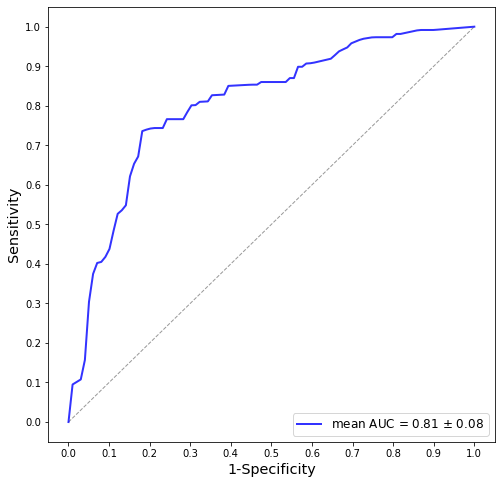

In [8]:
cv = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1_std, y1):
    probas_ = clf.fit(X1_std[train], y1[train]).predict_proba(X1_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean AUC = %0.2f $\pm$ %0.2f' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example', fontsize = 'x-large')
plt.legend(loc="lower right" , fontsize = 'large')
#plt.savefig('./Figure/bior1.1_LLL_val_roc.jpg',dpi=1200)
plt.show()

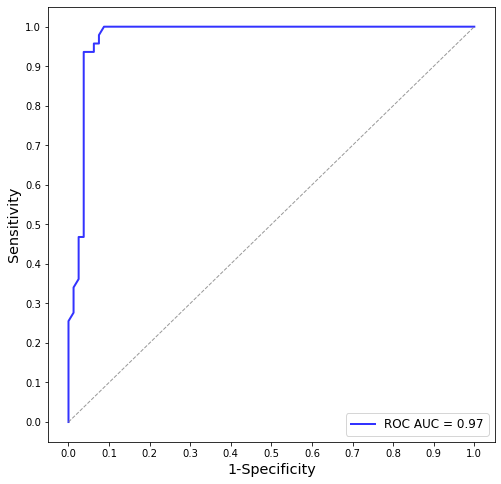

In [18]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
lw=2
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
probas_ = clf.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, linestyle='-',label='ROC AUC = %0.2f' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,fontsize = 'large')
#plt.savefig('./Figure/bior1.1_LLL_train_roc.jpg',dpi=1200)
plt.show()

## Read test set

In [10]:
df = pd.read_csv('./data/test/bior1.1.csv')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['y']))}
print(class_mapping)
df['y'] = df['y'].map(class_mapping)
y1_test = LabelEncoder().fit_transform(df['y'].values)
df2 = df[['wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 
              'wavelet-LLL_glcm_Autocorrelation', 
              'wavelet-LLL_glcm_JointAverage', 
              'wavelet-LLL_glcm_ClusterShade', 
              'wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis', 
              'wavelet-LLL_ngtdm_Busyness', 
              'wavelet-LLL_gldm_GrayLevelNonUniformity', 
              'wavelet-LLL_glszm_GrayLevelNonUniformity', 
              'wavelet-LLL_glcm_Correlation']]
df2.head()

{0: 0, 1: 1}


,wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glcm_Autocorrelation,wavelet-LLL_glcm_JointAverage,wavelet-LLL_glcm_ClusterShade,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_gldm_GrayLevelNonUniformity,wavelet-LLL_glszm_GrayLevelNonUniformity,wavelet-LLL_glcm_Correlation
0,7939.534772,6639.086602,78.067255,-9435.246085,55561.283790,0.028596,189.099207,74.905512,0.848003
1,4417.263116,4217.932087,60.390792,26819.492460,12636.376470,0.085598,74.471622,50.008179,0.728649
2,4340.120134,4227.465205,61.302348,-26628.660600,14905.578530,0.056700,40.856522,29.923591,0.749774
3,1585.060249,1392.243275,34.696534,32779.954440,8466.633356,0.130312,197.345182,76.572559,0.797858
4,1920.701486,1781.471777,37.865456,83090.945440,6766.611248,0.148956,128.628174,66.093045,0.759870


In [11]:
X1_test = df2.values
print(y1_test.shape)
print(X1_test.shape)
X1_test_std = std.fit_transform(X1_test)
print(X1_test_std.shape)

(60,)
(60, 9)
(60, 9)


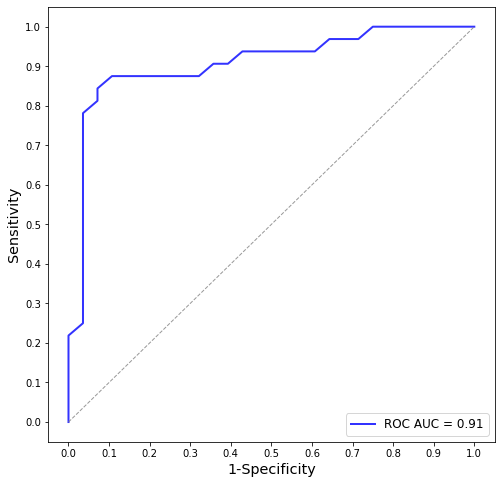

In [19]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
lw=2
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
probas_ = clf.predict_proba(X1_test_std)
fpr, tpr, thresholds = roc_curve(y1_test, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, linestyle='-',label='ROC AUC = %0.2f' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,fontsize = 'large')
plt.savefig('./Figure/bior1.1_LLL_test_roc.jpg',dpi=1200)
plt.show()

## The Figure 2

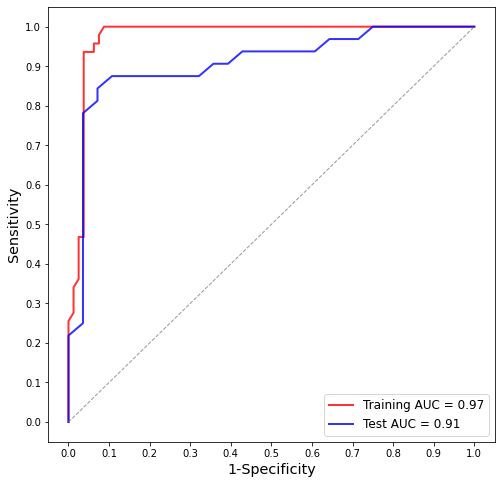

In [12]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
lw=2
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
probas_ = clf.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=.8, lw=lw, linestyle='-',label='Training AUC = %0.2f' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)

probas_ = clf.predict_proba(X1_test_std)
fpr, tpr, thresholds = roc_curve(y1_test, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, linestyle='-',label='Test AUC = %0.2f' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,fontsize = 'large')
#plt.savefig('./figures/final-roc.jpg',dpi=1200)
plt.show()

## Show some modeling results

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
y_true = y1
y_scores = clf.predict(X1_std)
roc_auc_score(y_true, y_scores)
m1 = classification_report(y_true, y_scores)
print(m1)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        80
           1       0.90      0.94      0.92        47

    accuracy                           0.94       127
   macro avg       0.93      0.94      0.93       127
weighted avg       0.94      0.94      0.94       127



In [14]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true, y_scores)
print(cm1)

[[75  5]
 [ 3 44]]


In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
y_true = y1_test
y_scores = clf.predict(X1_test_std)
roc_auc_score(y_true, y_scores)
m1 = classification_report(y_true, y_scores)
print(m1)
cm2 = confusion_matrix(y_true, y_scores)
print(cm2)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        28
           1       0.96      0.69      0.80        32

    accuracy                           0.82        60
   macro avg       0.84      0.83      0.82        60
weighted avg       0.85      0.82      0.81        60

[[27  1]
 [10 22]]


In [16]:
a = clf.predict_proba(X1_std)
print(a)

[[0.28 0.72]
 [0.14 0.86]
 [0.96 0.04]
 [0.35 0.65]
 [0.15 0.85]
 [0.02 0.98]
 [0.08 0.92]
 [1.   0.  ]
 [0.98 0.02]
 [0.68 0.32]
 [0.08 0.92]
 [0.21 0.79]
 [0.49 0.51]
 [0.7  0.3 ]
 [0.56 0.44]
 [0.52 0.48]
 [0.13 0.87]
 [0.09 0.91]
 [0.15 0.85]
 [0.71 0.29]
 [0.38 0.62]
 [0.03 0.97]
 [0.77 0.23]
 [0.02 0.98]
 [0.26 0.74]
 [0.95 0.05]
 [0.08 0.92]
 [0.98 0.02]
 [0.89 0.11]
 [0.9  0.1 ]
 [0.92 0.08]
 [0.68 0.32]
 [0.11 0.89]
 [0.89 0.11]
 [0.89 0.11]
 [0.75 0.25]
 [0.1  0.9 ]
 [0.79 0.21]
 [0.92 0.08]
 [0.99 0.01]
 [0.94 0.06]
 [0.98 0.02]
 [0.25 0.75]
 [0.39 0.61]
 [0.28 0.72]
 [0.99 0.01]
 [0.92 0.08]
 [0.8  0.2 ]
 [0.95 0.05]
 [0.71 0.29]
 [0.87 0.13]
 [0.91 0.09]
 [0.99 0.01]
 [0.94 0.06]
 [0.99 0.01]
 [0.93 0.07]
 [0.9  0.1 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.86 0.14]
 [0.99 0.01]
 [0.23 0.77]
 [0.14 0.86]
 [0.21 0.79]
 [0.35 0.65]
 [0.29 0.71]
 [0.24 0.76]
 [0.41 0.59]
 [0.92 0.08]
 [0.82 0.18]
 [0.96 0.04]
 [0.77 0.23]
 [0.71 0.29]
 [0.85 0.15]
 [0.88 0.12]
 [0.25 0.75]
 [0.87 0.13]

In [17]:
a[:,1]

array([0.72, 0.86, 0.04, 0.65, 0.85, 0.98, 0.92, 0.  , 0.02, 0.32, 0.92,
       0.79, 0.51, 0.3 , 0.44, 0.48, 0.87, 0.91, 0.85, 0.29, 0.62, 0.97,
       0.23, 0.98, 0.74, 0.05, 0.92, 0.02, 0.11, 0.1 , 0.08, 0.32, 0.89,
       0.11, 0.11, 0.25, 0.9 , 0.21, 0.08, 0.01, 0.06, 0.02, 0.75, 0.61,
       0.72, 0.01, 0.08, 0.2 , 0.05, 0.29, 0.13, 0.09, 0.01, 0.06, 0.01,
       0.07, 0.1 , 0.95, 0.95, 0.14, 0.01, 0.77, 0.86, 0.79, 0.65, 0.71,
       0.76, 0.59, 0.08, 0.18, 0.04, 0.23, 0.29, 0.15, 0.12, 0.75, 0.13,
       0.2 , 0.15, 0.7 , 0.01, 0.82, 0.87, 0.93, 0.11, 0.8 , 0.03, 0.08,
       0.11, 0.03, 0.01, 0.12, 0.12, 0.02, 0.28, 0.13, 0.03, 0.09, 0.09,
       0.65, 0.01, 0.03, 0.03, 0.13, 0.23, 0.84, 0.11, 0.13, 0.74, 0.88,
       0.97, 0.94, 0.96, 0.08, 0.91, 0.81, 0.61, 0.07, 0.14, 0.01, 0.01,
       0.45, 0.07, 0.83, 0.64, 0.02, 0.16])

In [18]:
b = clf.predict_proba(X1_test_std)
b[:,1]

array([0.64, 0.51, 0.54, 0.17, 0.34, 0.08, 0.29, 0.57, 0.17, 0.65, 0.3 ,
       0.53, 0.62, 0.08, 0.1 , 0.24, 0.39, 0.69, 0.23, 0.66, 0.09, 0.08,
       0.56, 0.56, 0.5 , 0.11, 0.27, 0.32, 0.41, 0.26, 0.49, 0.58, 0.26,
       0.8 , 0.69, 0.8 , 0.45, 0.73, 0.73, 0.35, 0.03, 0.38, 0.73, 0.41,
       0.31, 0.29, 0.77, 0.58, 0.37, 0.34, 0.31, 0.38, 0.2 , 0.26, 0.18,
       0.92, 0.56, 0.57, 0.23, 0.33])

## Save the prediction results

In [19]:
a_df = pd.DataFrame(a) 
writer = pd.ExcelWriter('train-nom.xlsx') 
a_df.to_excel(writer,'page_1',float_format='%.5f') 
writer.save()

In [20]:
b_df = pd.DataFrame(b) 
writer = pd.ExcelWriter('test-nom.xlsx') 
b_df.to_excel(writer,'page_1',float_format='%.5f') 
writer.save()